Kütüphaneler

In [2]:
import tensorflow as tf
import numpy as np
import pylab as pl 
from keras import backend as K 
import matplotlib.pyplot as plt 
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import layers, activations
from keras.preprocessing.image import ImageDataGenerator
import keras

Veri Yükleme

In [3]:
from tensorflow.keras.applications import VGG16

In [4]:
preprocess_input = keras.applications.vgg16.preprocess_input


In [5]:
base_dir = "../../veriler/tensorflow_f1"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1, preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1, preprocessing_function=preprocess_input)

train_datagen = train_datagen.flow_from_directory(base_dir, target_size=(224,224), subset="training", batch_size=2, class_mode="sparse")
test_datagen = test_datagen.flow_from_directory(base_dir, target_size=(224,224), subset="validation", batch_size=2, class_mode="sparse")


Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


Hazır Model

In [7]:
vgg_model = VGG16()

In [8]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
print(type(vgg_model))

<class 'keras.engine.functional.Functional'>


In [10]:
model = Sequential()

for layer in vgg_model.layers[0:-1]:
    model.add(layer)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [13]:
model.add(layers.Dense(4))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [15]:
result = model.fit(train_datagen, epochs=30, verbose=1, validation_data=test_datagen)

Epoch 1/30
126/126 [==============================] - 51s 393ms/step - loss: 1.4478 - accuracy: 0.2619 - val_loss: 1.4521 - val_accuracy: 0.2500
Epoch 2/30
126/126 [==============================] - 37s 290ms/step - loss: 1.3867 - accuracy: 0.3214 - val_loss: 1.4346 - val_accuracy: 0.2143
Epoch 3/30
126/126 [==============================] - 42s 330ms/step - loss: 1.3203 - accuracy: 0.4127 - val_loss: 1.4481 - val_accuracy: 0.2857
Epoch 4/30
126/126 [==============================] - 35s 276ms/step - loss: 1.2553 - accuracy: 0.4325 - val_loss: 1.4251 - val_accuracy: 0.2143
Epoch 5/30
126/126 [==============================] - 42s 332ms/step - loss: 1.2078 - accuracy: 0.5198 - val_loss: 1.4343 - val_accuracy: 0.2857
Epoch 6/30
126/126 [==============================] - 37s 289ms/step - loss: 1.1498 - accuracy: 0.5437 - val_loss: 1.4506 - val_accuracy: 0.2500
Epoch 7/30
126/126 [==============================] - 36s 284ms/step - loss: 1.1283 - accuracy: 0.5595 - val_loss: 1.4518 - val_ac

In [16]:
acc = result.history["accuracy"]
val_acc = result.history["val_accuracy"]
acc_loss = result.history["loss"]
val_loss = result.history["val_loss"]

epoch = range(1, len(acc)+1)

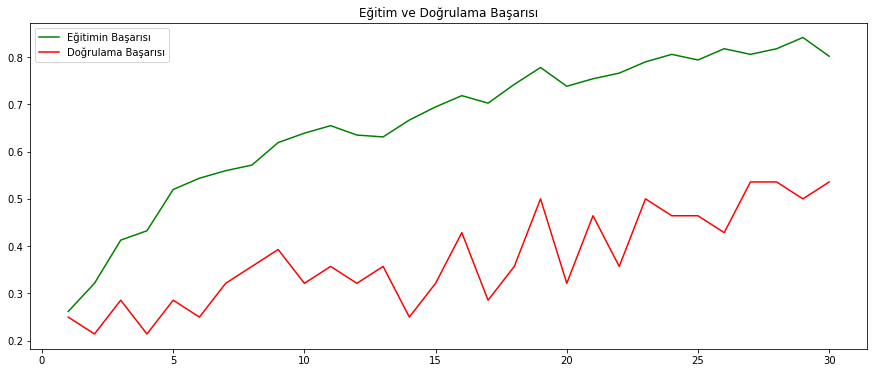

In [17]:
plt.figure(figsize=(15,6))
plt.plot(epoch, acc, label=("Eğitimin Başarısı"), color="g")
plt.plot(epoch, val_acc, label=("Doğrulama Başarısı"), color="r")
plt.title("Eğitim ve Doğrulama Başarısı")
plt.legend()

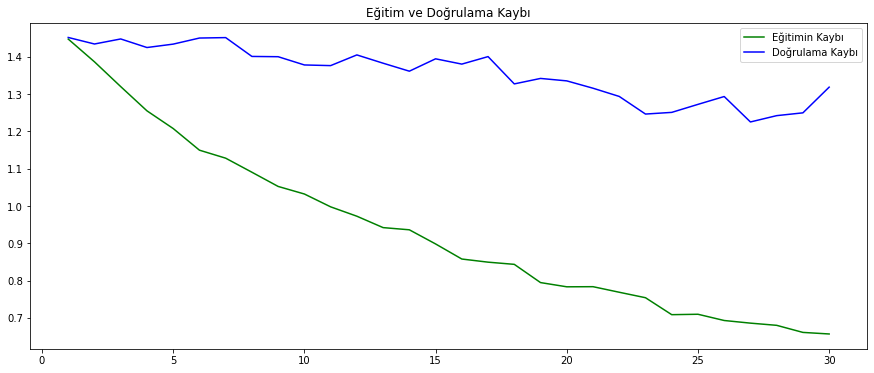

In [18]:
plt.figure(figsize=(15,6))
plt.plot(epoch, acc_loss, label=("Eğitimin Kaybı"), color= "g")
plt.plot(epoch, val_loss, label=("Doğrulama Kaybı"), color = "b")
plt.title("Eğitim ve Doğrulama Kaybı")
plt.legend()

Test

In [19]:
from PIL import Image
from skimage import transform

In [20]:
path = "../Images/f1.jpg"
image = Image.open("../Images/f1.jpg")

def resim(path):
    image = Image.open(path)
    image = np.array(image).astype("float32")/255
    image = transform.resize(image, (224,224,3))
    image = np.expand_dims(image, axis=0)
    print(test_datagen.class_indices)
    return image

image = resim(path)
pred = model.predict(image)
print(pred)
np.argmax(pred)

{'ferrari': 0, 'mclaren': 1, 'mercedes': 2, 'redbull': 3}
[[-1.1325939   0.19519551  0.7484535   0.55851245]]


2

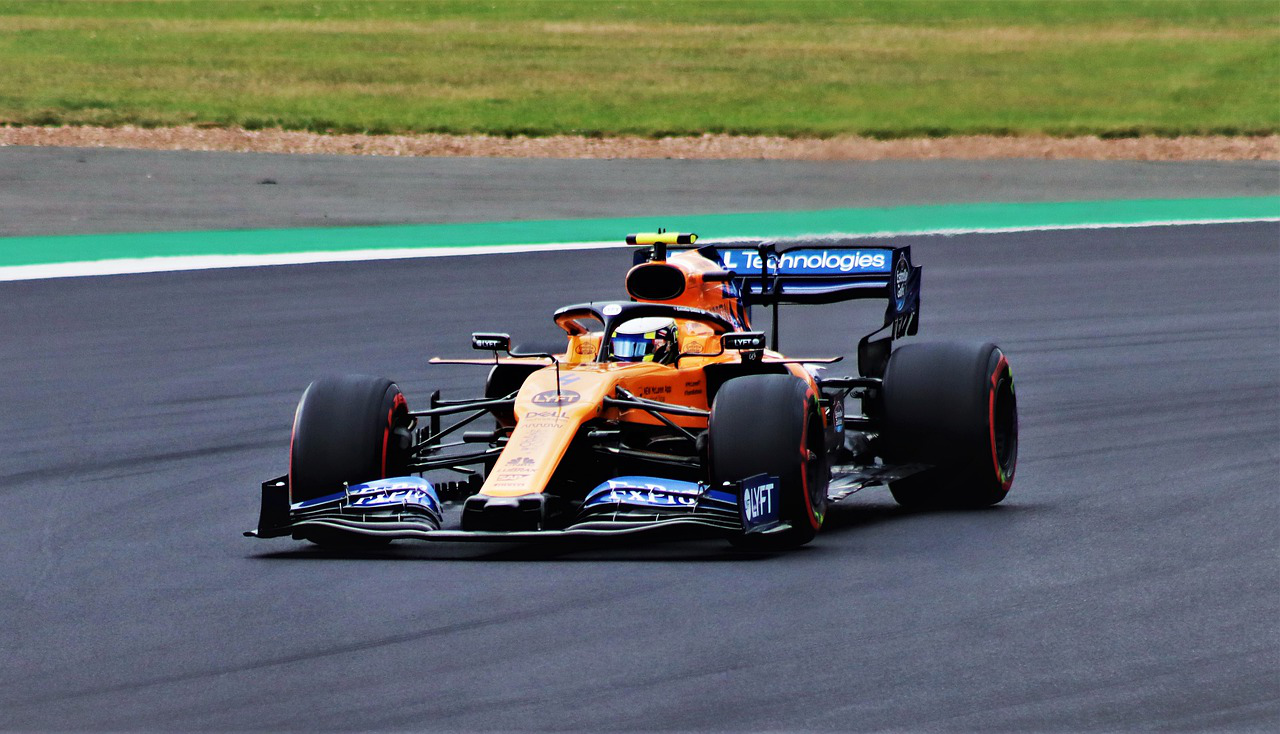

In [21]:
image = Image.open("../Images/f1.jpg")
image